In [1]:
%matplotlib inline

In [2]:
def ddxdtt(x, dxdt, mu):
    return mu * (1 - x**2) * dxdt - x

In [3]:
ddxdtt(1, 1, 1)

-1

In [4]:
def dudt(u, mu):
    x, dxdt = u
    dudt = array([dxdt, ddxdtt(x, dxdt, mu)])
    return dudt

In [5]:
dudt([1,1], 1)

array([ 1, -1])

In [6]:
from scipy.integrate import odeint

In [7]:
def run(u, mu, dt, nsteps):
    x = empty(nsteps)
    for i in range(nsteps):
        u = odeint(lambda u,t : dudt(u, mu), u, [0, dt])[1]
        x[i] = u[0]
    return u, x

In [8]:
u, x = run([1, 1], 1, 0.01, 5000)

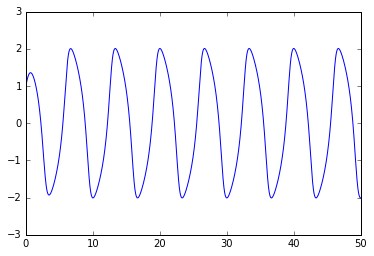

In [9]:
plot(0.01 * arange(x.size), x)